In [65]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt # очень годные графики
%matplotlib inline              
plt.style.use('ggplot')         # используем красивый стиль ггплота
from pylab import rcParams      # устанавливаем размер графиков 
rcParams['figure.figsize'] = 6, 6

In [160]:
data = pd.read_csv("C:\Serega\Python\cian.csv", encoding = 'iso-8859-1')
data['Kitsp'] = data['Kitsp'].replace('\x96', np.nan)
data.head()

,Unnamed: 0,Bal,Brick,Dist,District,Floor,Kitsp,Livesp,Metrdist,New,Nfloors,Price,Totsp,Walk,lat,lon,rooms
0,0,1,NaN,2900.122261,1,9,35,45,9.0,0,1.0,25000000,83.0,1.0,55.776006,37.646274,3.0
1,1,1,1.0,4126.204251,1,6,15,100,7.0,0,1.0,133846440,147.0,1.0,55.723699,37.583697,4.0
2,2,0,0.0,2829.209743,1,1,6.5,30,6.0,0,0.0,10850000,42.0,1.0,55.731075,37.629816,2.0
3,3,1,1.0,3716.069853,1,1,NaN,1,9.0,0,0.0,1730000,194.2,1.0,55.722142,37.618569,5.0
4,4,0,NaN,4079.279364,1,3,NaN,22.7,6.0,1,NaN,4403057,22.7,1.0,55.775753,37.671938,1.0


In [48]:
data.isnull().sum()

Unnamed: 0       0
Bal              0
Brick         1963
Dist             0
District         0
Floor            0
Kitsp         3441
Livesp           0
Metrdist       730
New              0
Nfloors        245
Price            0
Totsp            0
Walk           730
lat              0
lon              0
rooms           10
dtype: int64

In [49]:
data.columns

Index(['Unnamed: 0', 'Bal', 'Brick', 'Dist', 'District', 'Floor', 'Kitsp',
       'Livesp', 'Metrdist', 'New', 'Nfloors', 'Price', 'Totsp', 'Walk', 'lat',
       'lon', 'rooms'],
      dtype='object')

In [161]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [51]:
data.describe()

C:\Users\Samsung\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Bal,Brick,Dist,District,Floor,Metrdist,New,Nfloors,Price,Totsp,Walk,lat,lon,rooms
count,7308.000000,5345.000000,7308.000000,7308.000000,7308.000000,6578.000000,7308.000000,7063.000000,7.308000e+03,7308.000000,6578.000000,7308.000000,7308.000000,7298.000000
mean,0.440203,0.576052,14997.253604,5.000000,3.075807,11.465795,0.515599,3.799943,6.657336e+06,38.077148,0.614929,55.737917,37.603618,1.196766
std,0.496445,0.494228,6388.032964,2.582166,2.367727,6.275719,0.499791,2.780315,1.737012e+07,27.930838,0.486649,0.112603,0.163235,0.600288
min,0.000000,0.000000,999.450927,1.000000,1.000000,1.000000,0.000000,0.000000,1.390000e+04,13.000000,0.000000,55.503405,37.190388,1.000000
25%,0.000000,NaN,11378.559108,3.000000,1.000000,NaN,0.000000,NaN,3.814554e+06,27.900000,NaN,55.634298,37.494315,NaN
50%,0.000000,NaN,15432.355891,5.000000,2.000000,NaN,1.000000,NaN,4.100000e+06,33.000000,NaN,55.745488,37.597562,NaN
75%,1.000000,NaN,19736.774589,7.000000,5.000000,NaN,1.000000,NaN,4.600000e+06,38.300000,NaN,55.850472,37.690444,NaN
max,1.000000,1.000000,31569.335632,9.000000,9.000000,76.000000,1.000000,9.000000,5.750352e+08,537.000000,1.000000,55.925023,37.939370,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012B204D7D30>]], dtype=object)

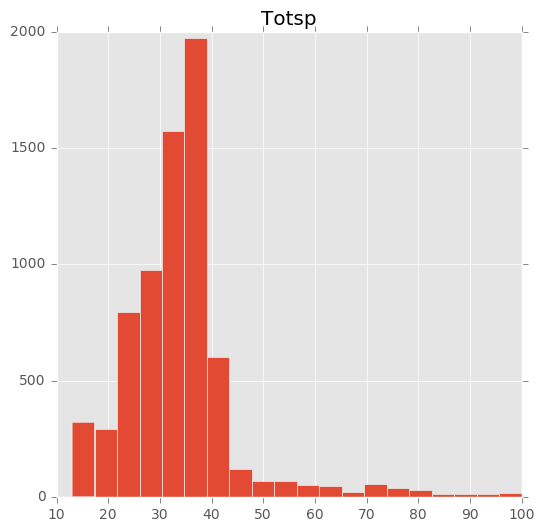

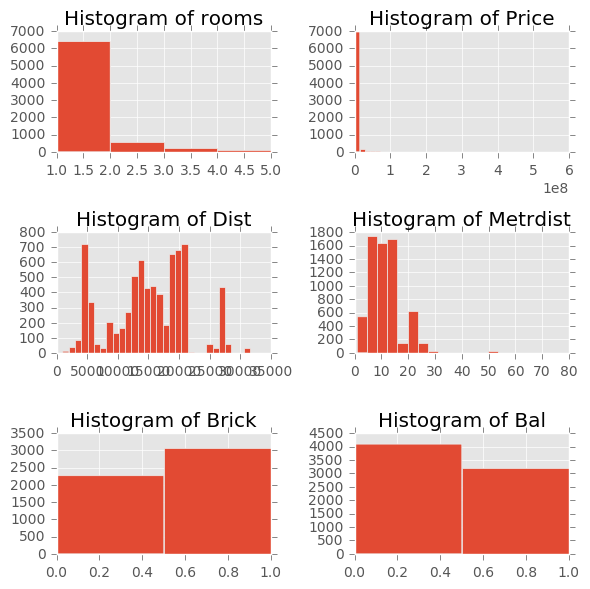

In [93]:
names = ['rooms', 'Price', 'Dist', 'Metrdist', 'Brick', 'Bal']
b = [4, 40, 30, 20, 2, 2]
f,a = plt.subplots(3,2)
a = a.ravel()
ind = 0
for idx,ax in enumerate(a):
    ax.hist(data[names[ind]].dropna(), bins = b[ind])
    ax.set_title('Histogram of {}'.format(names[ind]))
    ind += 1
plt.tight_layout()

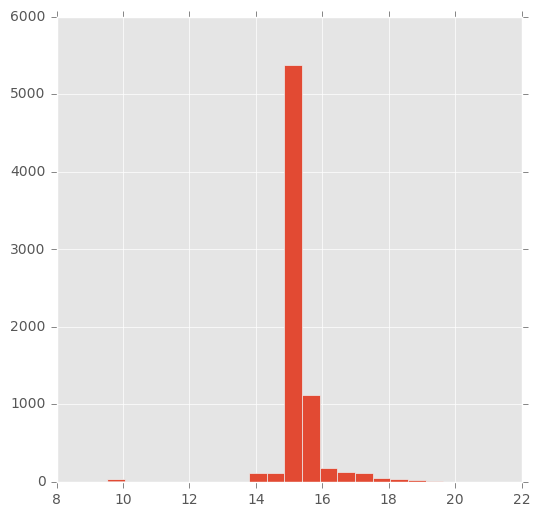

In [125]:
data['Price'].dropna().apply(np.log).hist(bins = 20)

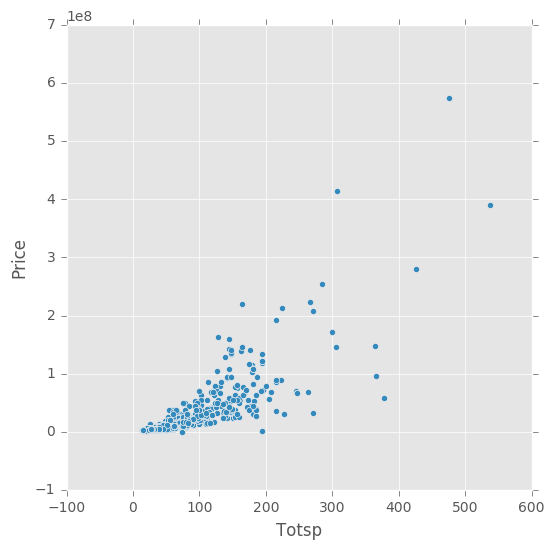

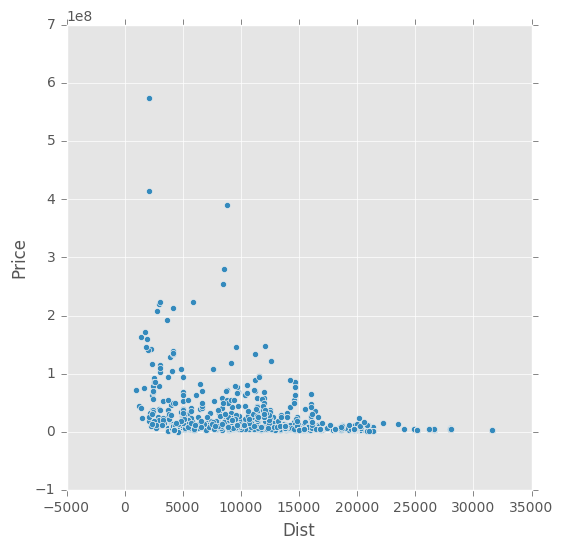

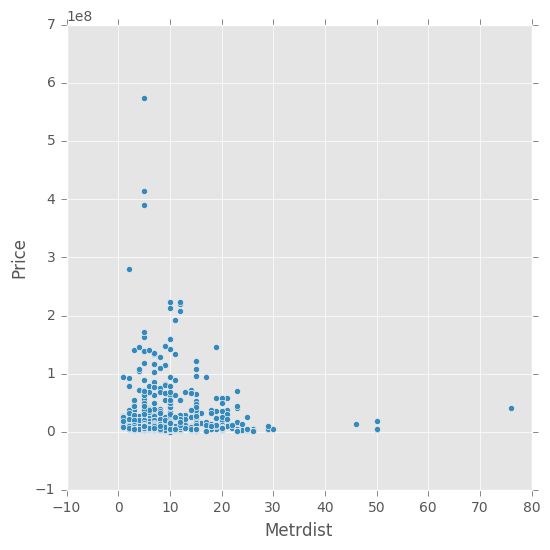

In [132]:
data.plot.scatter(x='Totsp', y='Price')
data.plot.scatter(x='Dist', y='Price')
data.plot.scatter(x='Metrdist', y='Price')

In [63]:
data.columns

Index(['Bal', 'Brick', 'Dist', 'District', 'Floor', 'Kitsp', 'Livesp',
       'Metrdist', 'New', 'Nfloors', 'Price', 'Totsp', 'Walk', 'lat', 'lon',
       'rooms'],
      dtype='object')

In [136]:
from sklearn import datasets, linear_model

In [162]:
#data = data.dropna()
data = data[(data['Livesp'] != '\x96')]
data = data[(data['Kitsp'] != '\x96')]
data['Livesp'] = data['Livesp'].astype(float)
data['Kitsp'] = data['Kitsp'].astype(float)

In [192]:
data = data.dropna()
data = data.ix[:, data.columns != 'lat']
data = data.ix[:, data.columns != 'lon']
data = data.ix[:, data.columns != 'District']
y = data['Price']
X = data.ix[:, data.columns != 'Price']
regr = linear_model.LinearRegression(normalize=True)

regr.fit(X, y)
for i in range (len(X.columns)):
    print(X.columns[i], ":\t" , regr.coef_[i])

Bal :	 -1507859.68107
Brick :	 1297128.24973
Dist :	 -310.453730347
Floor :	 169415.152184
Kitsp :	 -305592.359391
Livesp :	 74467.3738817
Metrdist :	 26721.2375812
New :	 -621065.175544
Nfloors :	 -206331.215584
Totsp :	 518898.940134
Walk :	 453852.03873
rooms :	 -5367449.78331


In [197]:
clf = linear_model.Lasso(alpha=10000, normalize=True)
clf.fit(X, y)
for i in range (len(X.columns)):
    print(X.columns[i], ":\t" , clf.coef_[i])

Bal :	 -356855.379166
Brick :	 310419.48973
Dist :	 -220.220096039
Floor :	 0.0
Kitsp :	 -0.0
Livesp :	 95956.6682729
Metrdist :	 -0.0
New :	 -0.0
Nfloors :	 -0.0
Totsp :	 356645.549633
Walk :	 0.0
rooms :	 -0.0
